In [123]:
#Importando as bibliotecas

In [124]:
from xml.sax.handler import all_features

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [125]:
#Carregando o Dataset

In [126]:
df = pd.read_csv('train.csv')

In [127]:
#Separando a variável alvo

In [128]:
y = df['SalePrice']
df = df.drop(columns='SalePrice')

In [129]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

In [130]:
#Criando as Pipelines

In [131]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), #Subtituindo valores nulos pela mediana
    ('scaler', StandardScaler()) #Escalando os valores
])

In [132]:
categorial_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), #Preenchendo campos vazios com missing
    ('onehot', OneHotEncoder(handle_unknown='ignore')) #Utilizando one-hot encoder para transformar os valores categoricos
])

In [133]:
#Juntando os processos

In [134]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorial_transformer, categorical_cols)
    ])

In [135]:
#Criando as próximas Pipelines

In [136]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [137]:
#Separando entre Treino e Teste

In [138]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=9)

In [139]:
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [140]:
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [141]:
importances = rf.feature_importances_

In [142]:
cat_encoder = preprocessor.named_transformers_['cat']['onehot']

In [143]:
cat_one_hot_features = list(cat_encoder.get_feature_names_out(categorical_cols))

In [144]:
all_features = list(numeric_cols) + cat_one_hot_features

In [145]:
selected_features = np.array(all_features)[sfm.get_support()]

In [146]:
for feature in selected_features:
    print(feature)

Id
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
GrLivArea
FullBath
TotRmsAbvGrd
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
ExterQual_Ex
BsmtQual_Ex


In [147]:
indices = np.argsort(importances)[::-1]

In [148]:
print('Feature ranking:')

Feature ranking:


In [149]:
for f in range(X_train.shape[1]):
    print('%d. feature %d (%f)' % (f + 1, indices[f],importances[indices[f]]))

1. feature 4 (0.563595)
2. feature 16 (0.120251)
3. feature 12 (0.031695)
4. feature 9 (0.030335)
5. feature 13 (0.025001)
6. feature 27 (0.022616)
7. feature 6 (0.017272)
8. feature 26 (0.015008)
9. feature 3 (0.011740)
10. feature 14 (0.011071)
11. feature 23 (0.007864)
12. feature 165 (0.006864)
13. feature 11 (0.006540)
14. feature 2 (0.006385)
15. feature 7 (0.006341)
16. feature 25 (0.005912)
17. feature 28 (0.005045)
18. feature 5 (0.004976)
19. feature 29 (0.004910)
20. feature 19 (0.004491)
21. feature 8 (0.004384)
22. feature 180 (0.003696)
23. feature 0 (0.003602)
24. feature 167 (0.003076)
25. feature 35 (0.002864)
26. feature 250 (0.002761)
27. feature 24 (0.002423)
28. feature 182 (0.002222)
29. feature 221 (0.001849)
30. feature 33 (0.001842)
31. feature 36 (0.001774)
32. feature 72 (0.001759)
33. feature 41 (0.001669)
34. feature 21 (0.001647)
35. feature 246 (0.001524)
36. feature 220 (0.001396)
37. feature 193 (0.001367)
38. feature 123 (0.001274)
39. feature 168 (0.0

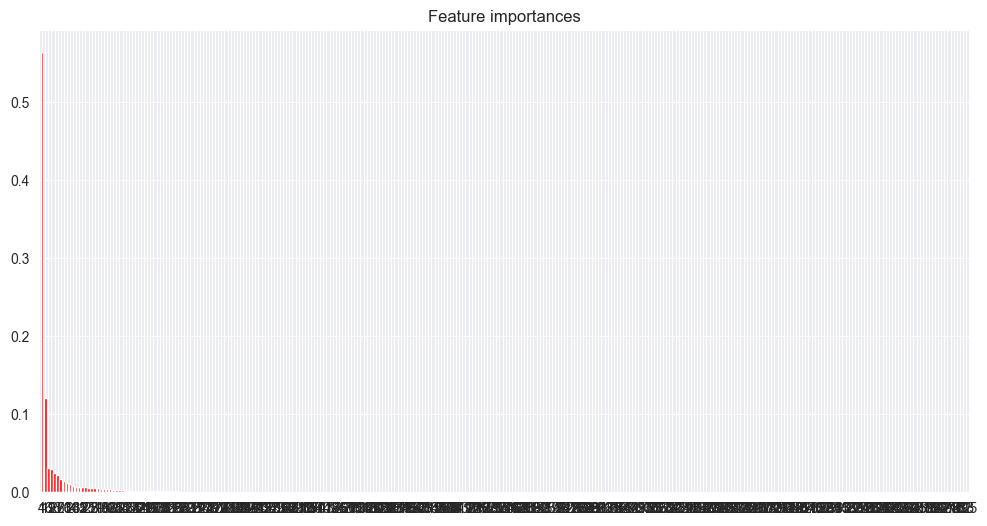

In [150]:
plt.figure(figsize=(12,6))
plt.title('Feature importances')
plt.bar(range(X_train.shape[1]), importances[indices],
color='r', align='center')
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [151]:
rf=RandomForestRegressor(n_estimators=100, random_state=9)

In [152]:
sfm = SelectFromModel(rf)

In [153]:
sfm.fit(X_train, y_train)

,estimator,RandomForestR...andom_state=9)
,threshold,None
,prefit,False
,norm_order,1
,max_features,None
,importance_getter,'auto'
,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1


In [154]:
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

In [155]:
rf.fit(X_train_selected, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [156]:
y_pred_train=rf.predict(X_train_selected)
y_pred_test=rf.predict(X_test_selected)

In [157]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [158]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

In [159]:
print(f'Erro médio ao quadrado do treino: {mse_train}')
print(f'Erro médio ao quadrado do teste: {mse_test}')
print(f'Erro médio absoluto do treino: {mae_train}')
print(f'Erro médio absoluto do teste: {mae_test}')
print(f'r² do treino: {r2_train}')
print(f'r² do teste: {r2_test}')

Erro médio ao quadrado do treino: 157893763.2542114
Erro médio ao quadrado do teste: 722703031.0444026
Erro médio absoluto do treino: 6958.839768835617
Erro médio absoluto do teste: 16692.347671232874
r² do treino: 0.9742215070902743
r² do teste: 0.8958626162263426


In [160]:
import joblib

In [161]:
joblib.dump(rf, 'model.pkl')

['model.pkl']

In [162]:
loaded_model = joblib.load('model.pkl')

In [163]:
y_pred = loaded_model.predict(X_test_selected)